### Embedding Demo

https://www.cs.cmu.edu/~dst/WordEmbeddingDemo/index.html

Word2Vec is the most popular word embedding model. 

There are two implementations of word2vec: CBOW (Continuous Bag-Of-Words) та Skip-gram.

with CBOW requires cotext window around a target word. Then words from context window to be fed as input to our neural network and then use it to try to predict the target word.

Skip-gram does the opposite: you have a target word and you try to predict the words that are in the context window around that word, i.e. predict the context around the word.

### Tokenization, lemmatization, stemming, cleaning

In [54]:
import nltk
import spacy
import matplotlib.pyplot as plt
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup

In [3]:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

In [31]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [48]:
stop = stopwords.words('english')

In [49]:
mapping = {"ain't": "is not", "aren't": "are not", "can't": "cannot",
           "'cause": "because", "could've": "could have", "couldn't": "could not",
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
           "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'll": "he will",
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will",
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will",
           "I'll've": "I will have", "I'm": "I am", "I've": "I have", "i'd": "i would",
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
           "might've": "might have", "mightn't": "might not", "mightn't've": "might not have",
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
           "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock",
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would",
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
           "she's": "she is", "should've": "should have", "shouldn't": "should not",
           "shouldn't've": "should not have", "so've": "so have", "so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is",
           "there'd": "there would", "there'd've": "there would have", "there's": "there is",
           "here's": "here is", "they'd": "they would", "they'd've": "they would have",
           "they'll": "they will", "they'll've": "they will have", "they're": "they are",
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
           "we're": "we are", "we've": "we have", "weren't": "were not",
           "what'll": "what will", "what'll've": "what will have", "what're": "what are",
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will",
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
           "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have",
           "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would",
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
           "you're": "you are", "you've": "you have"}

In [50]:
wl = WordNetLemmatizer()

In [55]:
# clean Text

def clean_text(text, lemmatize=True):
    soup = BeautifulSoup(text, "html.parser")  # remove html tags
    text = soup.get_text()
    # expanding chatwords and contracts clearing contractions
    text = ' '.join(
        [mapping[t] if t in mapping else t for t in text.split(" ")])
    emoji_clean = re.compile("["
                             u"\U0001F600-\U0001F64F"  # emoticons
                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             u"\U00002702-\U000027B0"
                             u"\U000024C2-\U0001F251"
                             "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'', text)
    text = re.sub(r'\.(?=\S)', '. ', text)  # add space after full stop
    text = re.sub(r'http\S+', '', text)  # remove urls
    # remove punctuation
    text = "".join([word.lower()
                   for word in text if word not in string.punctuation])
    # tokens = re.split('\W+', text) #create tokens
    if lemmatize:
        text = " ".join([wl.lemmatize(word) for word in text.split(
        ) if word not in stop and word.isalpha()])  # lemmatize
    else:
        text = " ".join([word for word in text.split()
                        if word not in stop and word.isalpha()])
    return text

In [59]:
text = clean_text(text, lemmatize=True)
print(text)

machine learning study computer algorithm improve automatically experience seen subset artificial intelligence machine learning algorithm build mathematical model based sample data known training data order make prediction decision without explicitly programmed machine learning algorithm used wide variety application email filtering computer vision difficult infeasible develop conventional algorithm perform needed task


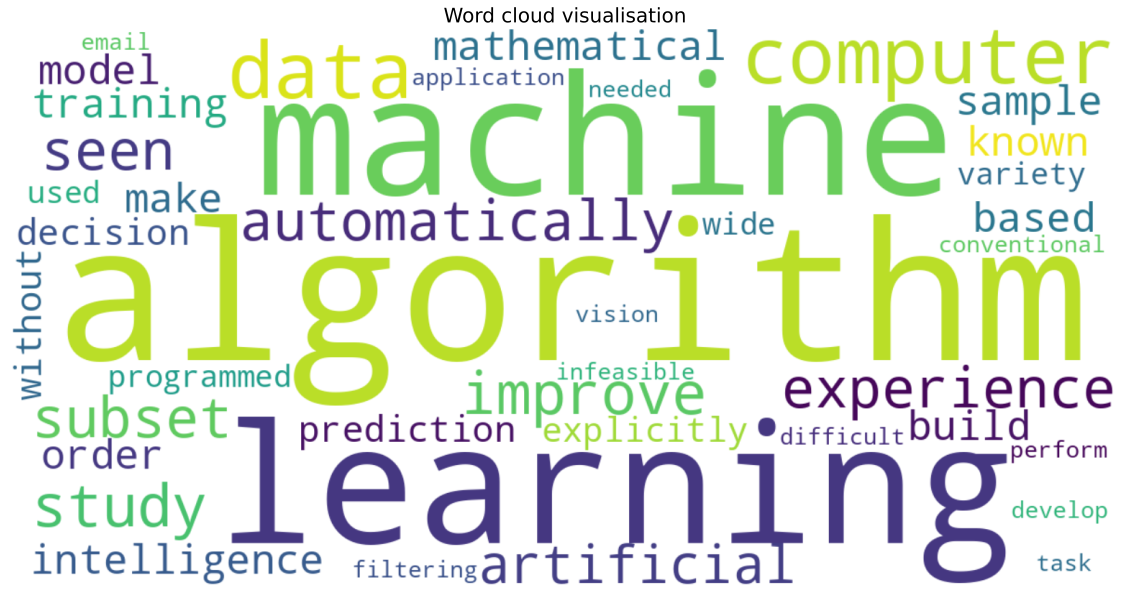

In [58]:
# Word cloud visualisation

plt.figure(figsize=(20, 20))
wc = WordCloud(
    max_words=2000, width=1200, height=600, background_color="white"
).generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud visualisation', fontsize=20)
plt.show()

In [37]:
! python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [38]:
nlp = spacy.load('en_core_web_sm')

In [39]:
# Tokenization with spacy

doc = nlp(text)
tokens = [token.text for token in doc]
print(tokens)

['Machine', 'learning', 'is', 'the', 'study', 'of', 'computer', 'algorithms', 'that', 'improve', 'automatically', 'through', 'experience', '.', 'It', 'is', 'seen', 'as', 'a', 'subset', 'of', 'artificial', 'intelligence', '.', 'Machine', 'learning', 'algorithms', 'build', 'a', 'mathematical', 'model', 'based', 'on', 'sample', 'data', ',', 'known', 'as', 'training', 'data', ',', 'in', 'order', 'to', 'make', 'predictions', 'or', 'decisions', 'without', 'being', 'explicitly', 'programmed', 'to', 'do', 'so', '.', 'Machine', 'learning', 'algorithms', 'are', 'used', 'in', 'a', 'wide', 'variety', 'of', 'applications', ',', 'such', 'as', 'email', 'filtering', 'and', 'computer', 'vision', ',', 'where', 'it', 'is', 'difficult', 'or', 'infeasible', 'to', 'develop', 'conventional', 'algorithms', 'to', 'perform', 'the', 'needed', 'tasks', '.']


In [40]:
# Tokenization with nltk
tokens = word_tokenize(text)
sentences = sent_tokenize(text)
stop_words = set(stopwords.words('english'))

print(tokens)
print(sentences)
print(stop_words)

['Machine', 'learning', 'is', 'the', 'study', 'of', 'computer', 'algorithms', 'that', 'improve', 'automatically', 'through', 'experience', '.', 'It', 'is', 'seen', 'as', 'a', 'subset', 'of', 'artificial', 'intelligence', '.', 'Machine', 'learning', 'algorithms', 'build', 'a', 'mathematical', 'model', 'based', 'on', 'sample', 'data', ',', 'known', 'as', 'training', 'data', ',', 'in', 'order', 'to', 'make', 'predictions', 'or', 'decisions', 'without', 'being', 'explicitly', 'programmed', 'to', 'do', 'so', '.', 'Machine', 'learning', 'algorithms', 'are', 'used', 'in', 'a', 'wide', 'variety', 'of', 'applications', ',', 'such', 'as', 'email', 'filtering', 'and', 'computer', 'vision', ',', 'where', 'it', 'is', 'difficult', 'or', 'infeasible', 'to', 'develop', 'conventional', 'algorithms', 'to', 'perform', 'the', 'needed', 'tasks', '.']
['Machine learning is the study of computer algorithms that improve automatically through experience.', 'It is seen as a subset of artificial intelligence.', 

### Word2Vec from scratch

source: https://jaketae.github.io/study/word2vec/

In [4]:
import re


def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

In [5]:
tokens = tokenize(text)
print(tokens)

['machine', 'learning', 'is', 'the', 'study', 'of', 'computer', 'algorithms', 'that', 'improve', 'automatically', 'through', 'experience', 'it', 'is', 'seen', 'as', 'a', 'subset', 'of', 'artificial', 'intelligence', 'machine', 'learning', 'algorithms', 'build', 'a', 'mathematical', 'model', 'based', 'on', 'sample', 'data', 'known', 'as', 'training', 'data', 'in', 'order', 'to', 'make', 'predictions', 'or', 'decisions', 'without', 'being', 'explicitly', 'programmed', 'to', 'do', 'so', 'machine', 'learning', 'algorithms', 'are', 'used', 'in', 'a', 'wide', 'variety', 'of', 'applications', 'such', 'as', 'email', 'filtering', 'and', 'computer', 'vision', 'where', 'it', 'is', 'difficult', 'or', 'infeasible', 'to', 'develop', 'conventional', 'algorithms', 'to', 'perform', 'the', 'needed', 'tasks']


In [6]:
def mapping(tokens):
    word_to_id = {}
    id_to_word = {}

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    return word_to_id, id_to_word

In [7]:
word_to_id, id_to_word = mapping(tokens)
print(word_to_id)
print(id_to_word)

{'experience': 0, 'artificial': 1, 'data': 2, 'known': 3, 'variety': 4, 'where': 5, 'infeasible': 6, 'make': 7, 'without': 8, 'that': 9, 'algorithms': 10, 'difficult': 11, 'of': 12, 'to': 13, 'explicitly': 14, 'subset': 15, 'build': 16, 'is': 17, 'so': 18, 'applications': 19, 'vision': 20, 'or': 21, 'conventional': 22, 'predictions': 23, 'perform': 24, 'email': 25, 'a': 26, 'improve': 27, 'automatically': 28, 'training': 29, 'filtering': 30, 'computer': 31, 'order': 32, 'seen': 33, 'in': 34, 'such': 35, 'the': 36, 'mathematical': 37, 'programmed': 38, 'do': 39, 'based': 40, 'develop': 41, 'intelligence': 42, 'learning': 43, 'sample': 44, 'used': 45, 'tasks': 46, 'wide': 47, 'study': 48, 'through': 49, 'decisions': 50, 'as': 51, 'machine': 52, 'model': 53, 'on': 54, 'being': 55, 'needed': 56, 'it': 57, 'are': 58, 'and': 59}


In [9]:
# generate training data

import numpy as np

np.random.seed(42)


def concat(*iterables):
    for iterable in iterables:
        yield from iterable


def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res


def generate_training_data(tokens, word_to_id, context_window=2):
    X = []
    y = []
    n_tokens = len(tokens)

    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - context_window), i),
            range(i, min(n_tokens, i + context_window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))

    return np.asarray(X), np.asarray(y)

In [10]:
X, y = generate_training_data(tokens, word_to_id, 2)
print(X.shape)
print(y.shape)

(330, 60)
(330, 60)


### Embedding Neural Network Training:

In [12]:
def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model

In [13]:
model = init_network(len(word_to_id), 10)

In [15]:
def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res


def forward(model, X, return_cache=True):
    # y = softmax(x @ W1 @ W2)
    # embedding = x@ W1

    cache = {}

    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])

    if not return_cache:
        return cache["z"]
    return cache

In [16]:
# Back-Propagation

def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)


def backward(model, X, y, alpha):
    cache = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert (dw2.shape == model["w2"].shape)
    assert (dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)

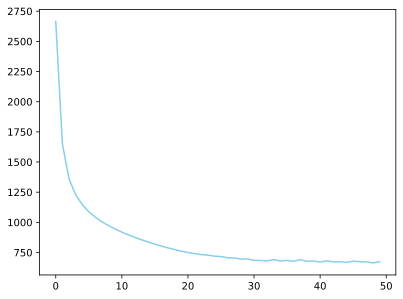

In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# plt.style.use("seaborn")

n_iter = 50
learning_rate = 0.05

history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()

In [27]:
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("`word` not in corpus")
        # return "OOV"
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot)["a1"]

In [28]:
get_embedding(model, "learning")

array([ 0.2459076 , -1.16577147,  1.68865145,  1.90727507,  1.15432268,
       -0.75505066,  0.40163421, -0.3794732 ,  0.04697963, -0.25684426])